In [1]:
# BIỂU ĐỒ CƠ BẢN VỚI MATPLOTLIB
# Vẽ từng hình lẻ
# bar chart: plt.bar
# pie chart: plt.pie
# line plot: plt.plot
# scatter plot: plt.scatter

# Kết hợp các hình
  # Cùng trục
    # Cùng trục y:
      # hình 1
      # hình 2
      # plt.show()
    # Bên trái trục y1, bên phải trục y2
      # axes1 = plt.gca()
      # axes2 = axes1.twinx()
      # hình 2: axes2.
  # Cùng khung: 2 hình trên, 2 hình dưới
    # fig, ax = plt.subplots(2,2)
    # hình phía trên bên trái: ax[0][0].bar()
    # hình phía trên bên phải: ax[0][1].
    # hình phía dưới bên trái: ax[1][0].
    # hình cuối cùng: ax[1][1].

In [2]:
# BIỂU ĐỒ NÂNG CAO VỚI SEABORN

# Mối quan hệ giữa 2 biến: lmplot() = scatter plot + line plot

# Mô tả phân bổ của biến
  # biến định lượng: histogram (sns.hist), violinplot
  # biến định tính: countplot()

# So sánh giữa 2 biến: boxplot (so khoảng của mỗi biến)

# Nhiều biến: Xem mối quan hệ giữa các cặp biến và phân bổ của từng biến
  # Xem mối quan hệ giữa các biến: heatmap
  # Xem mối quan hệ giữa các cặp biến + Xem phân bổ của từng biến: pairplot

# Thực hành với bộ dữ liệu Online Retail

In [3]:
# Khai báo thư viện cần dùng
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Đọc dữ liệu
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

In [5]:
# Tạo ra cột mới, "Price" của mỗi đơn hàng
df['Price']=df['UnitPrice']*df['Quantity']

In [6]:
# Xem dữ liệu
# Xem dạng dữ liệu từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Price        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
# Xem tổng quát thống kê
df.describe()

,Quantity,UnitPrice,CustomerID,Price
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [8]:
df = df.dropna()

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID,Price
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


## Vẽ biểu đồ phân phối

<Axes: >

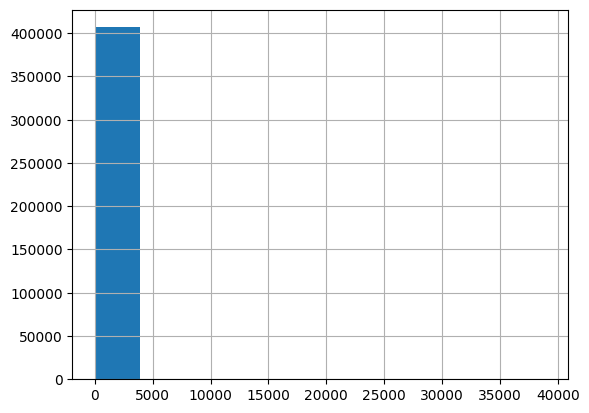

In [10]:
# Vẽ biểu đồ mô tả phân bổ đơn giá sản phẩm
df['UnitPrice'].hist()

<Axes: >

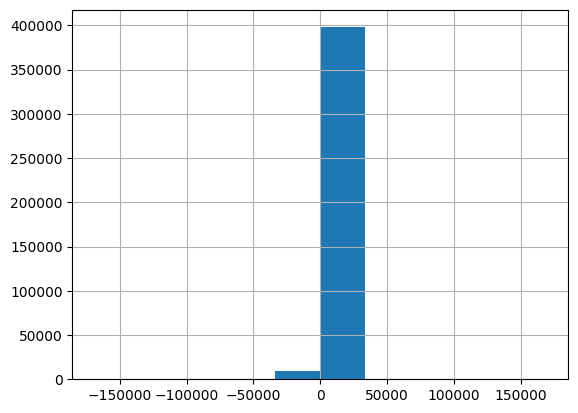

In [11]:
# Vẽ biểu đồ mô tả phân bổ giá của mỗi đơn hàng
df['Price'].hist()

Đa phần đơn giá dưới 5000, nhưng có đơn giá cao bất thường giá trị max 38970

# Xem tần suất

<Axes: xlabel='Country', ylabel='count'>

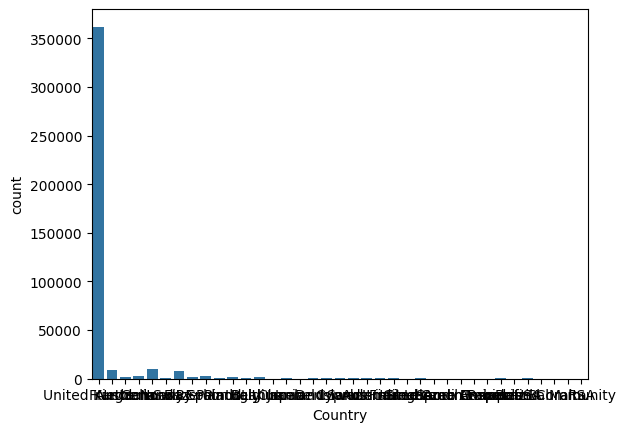

In [12]:
# Giả sử: mỗi dòng dữ liệu là một đơn hàng
# Xem mỗi quốc gia có bao nhiêu đơn hàng (Đếm)
sns.countplot(x='Country', data=df)

<Axes: xlabel='Country', ylabel='count'>

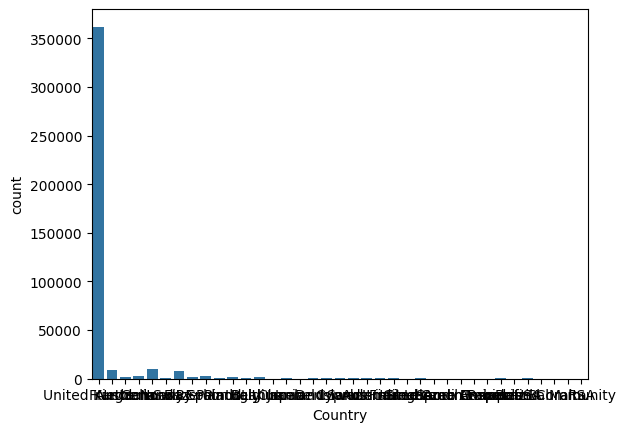

In [13]:
sns.countplot(x=df['Country'])

In [25]:
df['Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


#### xem 5 quốc gia có nhiều đơn hàng nhất

<BarContainer object of 5 artists>

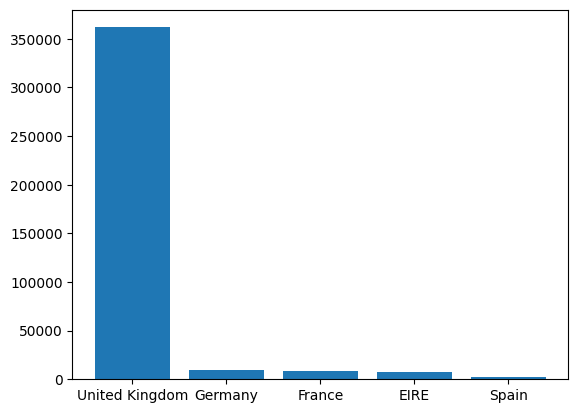

In [14]:
top_df = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
top_df_5= top_df.head(5)
top_df_5 = top_df_5.reset_index()
plt.bar(top_df_5['Country'], top_df_5['InvoiceNo'])

In [15]:
# Xem top 5 quốc gia nhiều đơn hàng nhất
lst = df['Country'].value_counts().head().index.to_list()

<Axes: xlabel='Country', ylabel='count'>

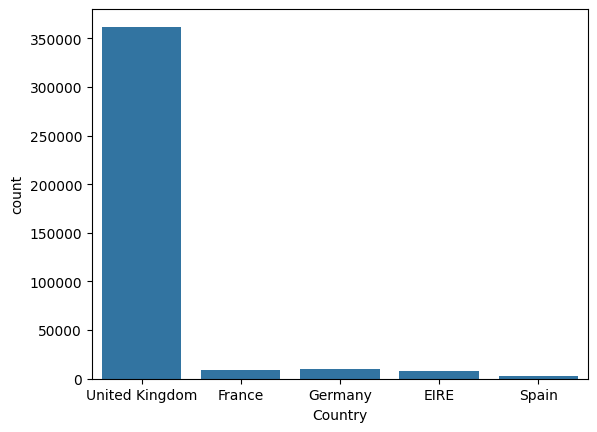

In [16]:
# Xem top 5 quốc gia nhiều đơn hàng nhất
lst = df['Country'].value_counts().head().index.to_list()
df1 = df[df['Country'].isin(lst)]
sns.countplot(x=df1['Country'])

In [17]:
df2 = df['Country'].value_counts().head().reset_index()
df2.columns = ['Country', 'Count']

<BarContainer object of 5 artists>

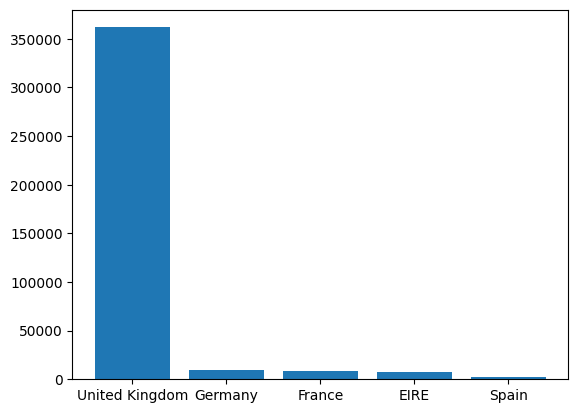

In [18]:
plt.bar(df2['Country'], df2['Count'])

## Vẽ biểu đồ boxplot

<Axes: xlabel='UnitPrice'>

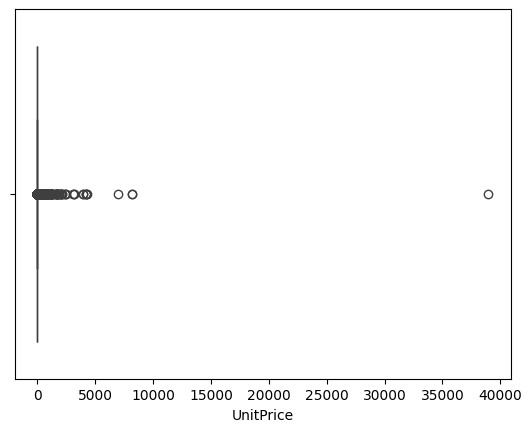

In [19]:
# Vẽ boxplot của UnitPrice
sns.boxplot(x=df['UnitPrice'])

<Axes: xlabel='Quantity'>

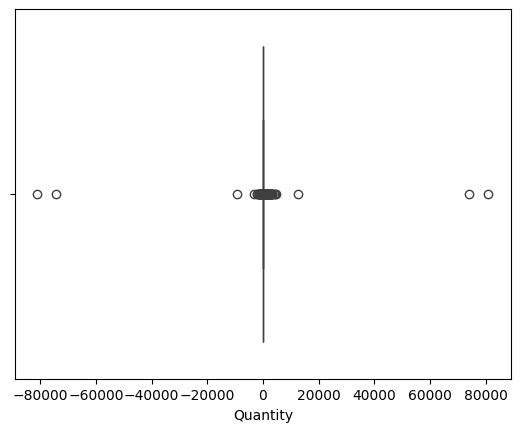

In [20]:
sns.boxplot(x=df['Quantity'])

In [21]:
lst1 = df[df['Quantity'] < 0]['InvoiceNo'].unique().tolist()
df2 = df[~df['InvoiceNo'].isin(lst1)]

In [22]:
df2.describe()

,Quantity,UnitPrice,CustomerID,Price
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [23]:
df2['InvoiceNo'].astype('int').reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   index      397924 non-null  int64
 1   InvoiceNo  397924 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 4.6 MB


# Thực hành với bộ dữ liệu GDPlist

In [24]:
df = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")

FileNotFoundError: [Errno 2] No such file or directory: 'GDPlist.csv'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Vẽ biểu đồ để xem phân bổ dữ liệu của cột GDP (millions of US$)
df["GDP (millions of US$)"].hist()

In [ ]:
# Vẽ biểu đồ xem phân bổ GDP ở châu á
df1 = df[df['Continent'] == 'Asia']
df1["GDP (millions of US$)"].hist()

In [ ]:
# Vẽ biểu đồ để so sánh khoảng GDP giữa các châu lục
sns.boxplot(x = df['Continent'], y = 'GDP (millions of US$)', data = df)